In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
import datetime as dt


#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns


# ML Matrix + Performance params
from sklearn.metrics import f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Fixing Balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from collections import Counter
from imblearn.pipeline import Pipeline


#Load the ML Algos
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB

# Other
import os
from itertools import cycle

In [46]:
df = pd.read_csv('terraclimate2000_2021_18_features.csv').drop('Unnamed: 0',axis=1)

In [47]:
df.head()

,decimalLatitude,decimalLongitude,cluster,occurrenceStatus,key,aet_mean,def_mean,pdsi_mean,pet_mean,ppt_mean,...,soil_mean,srad_mean,tmax_mean,tmax_station_influence_mean,tmin_mean,tmin_station_influence_mean,vap_mean,vap_station_influence_mean,vpd_mean,ws_mean
0,-38.045122,145.326047,0,0,0,57.445833,44.995833,-3.376250,102.412500,60.545833,...,62.204167,178.504167,20.057085,6.4,10.082502,6.4,1.177583,6.391667,0.656333,4.845417
1,-38.030947,145.432053,0,0,1,67.095833,31.216667,-3.432083,98.287500,72.254167,...,115.916667,178.379167,19.570835,6.4,9.317085,6.4,1.147042,6.391667,0.614333,4.658750
2,-38.088716,145.722909,0,0,2,62.287500,36.450000,-3.549583,98.691667,66.000000,...,90.233333,179.412500,20.120418,6.4,9.410002,6.4,1.169000,6.391667,0.644417,4.260000
3,-37.807553,145.263607,0,0,3,62.966667,41.016667,-2.847500,103.991667,67.729167,...,69.966667,178.550000,20.280001,6.4,9.713335,6.4,1.131250,6.391667,0.708958,4.435833
4,-37.991842,145.118825,0,0,4,49.912500,58.070833,-3.313750,107.987500,52.570833,...,28.270833,179.416667,20.377918,6.4,10.522502,6.4,1.195583,6.391667,0.677208,5.472083


In [48]:
print(len(df))
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print(len(df))

33690
33649


In [49]:
df.groupby(['cluster','occurrenceStatus']).count()['key']

cluster  occurrenceStatus
0        0                   6886
         1                    156
1        0                   7868
         1                   7693
2        0                    784
         1                   2204
3        0                    206
         1                   1138
4        0                   6714
Name: key, dtype: int64

In [50]:
df.columns

Index(['decimalLatitude', 'decimalLongitude', 'cluster', 'occurrenceStatus',
       'key', 'aet_mean', 'def_mean', 'pdsi_mean', 'pet_mean', 'ppt_mean',
       'ppt_station_influence_mean', 'q_mean', 'soil_mean', 'srad_mean',
       'tmax_mean', 'tmax_station_influence_mean', 'tmin_mean',
       'tmin_station_influence_mean', 'vap_mean', 'vap_station_influence_mean',
       'vpd_mean', 'ws_mean'],
      dtype='object')

In [51]:
# # X = df[['cluster', 'aet_mean', 'def_mean', 'pdsi_mean', 'pet_mean', 'ppt_mean',
# #        'ppt_station_influence_mean', 'q_mean', 'soil_mean', 'srad_mean',
# #        'tmax_mean', 'tmax_station_influence_mean', 'tmin_mean',
# #        'tmin_station_influence_mean', 'vap_mean', 'vap_station_influence_mean',
# #        'vpd_mean', 'ws_mean']]
# # y = df.occurrenceStatus
# # print(y.value_counts())

# X = df[['def_mean','tmin_mean']]
# y = df.occurrenceStatus
# print(y.value_counts())


In [52]:
# # define pipeline
# over = SMOTE(sampling_strategy=0.9)
# under = RandomUnderSampler(sampling_strategy=0.8)
# steps = [('u', under), ('o',over)]
# pipeline = Pipeline(steps=steps)
# # transform the dataset
# X, y = pipeline.fit_resample(X, y)

# temp_df = pd.concat([X,y],axis=1)
# print(y.value_counts())

In [53]:
# temp_df.groupby(['cluster','occurrenceStatus']).count()['aet_mean']

In [54]:
# import seaborn as sns

# sns.pairplot(df[['aet_mean','ppt_mean']])

In [55]:
df.dropna(inplace=True)

In [56]:
df.drop_duplicates(inplace=True)

In [57]:
#Predictor Variables
X = df[['vap_mean','vpd_mean','ws_mean']]    #Change the same in data_unseen

#Target
y = df[['occurrenceStatus']]

In [ ]:
# # summarize class distribution
# print(y.value_counts())

# # define pipeline
# #Oversampling using smote - https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
# smt = SMOTETomek(sampling_strategy = 'auto')
# X_res, y_res = smt.fit_resample(X, y)


# # summarize class distribution
# print(y_res.value_counts())

In [59]:
X_res, y_res = X , y

In [60]:
X_res.describe()

,vap_mean,vpd_mean,ws_mean
count,33649.000000,33649.000000,33649.000000
mean,1.397772,0.799319,4.033520
std,0.224415,0.144665,0.665548
min,0.909458,0.445167,2.360417
25%,1.288250,0.721292,3.586250
50%,1.426958,0.737292,3.945417
75%,1.459542,0.848421,4.512917
max,2.424583,1.129917,5.928333


In [61]:
# example of a normalization
from sklearn.preprocessing import MinMaxScaler
# define data
data = X_res
# define min max scaler
scaler = MinMaxScaler()
# transform data
X_scaled = scaler.fit_transform(data)
print(X_scaled)

[[0.1769656  0.30838506 0.69648488]
 [0.15680775 0.2470488  0.64416677]
 [0.1713005  0.29098211 0.53240686]
 ...
 [0.28031241 0.79274674 0.69087936]
 [0.3025603  0.80704637 0.81513488]
 [0.25979705 0.95198978 0.52621745]]


In [62]:
y_res = y_res.astype('category')

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_res, test_size=0.30, random_state=1)

In [79]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5) 

In [80]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test,y_test)
    print(f"F1 Score: {np.mean(f1_score(y_test, preds)).round(2)}")
    print(f"Accuracy: {np.mean(accuracy_score(y_test, preds)).round(2)}")

In [83]:
#MLP

MLP = MLPClassifier(max_iter=2000)

# mlp_param_grid = {
#     'hidden_layer_sizes': [(50,50),(100)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive']}

# mlp_param_grid = {
#     'hidden_layer_sizes': [(6,18,6)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['adam'],
#     'alpha': [0.0001,0.0005, 0.001],
#     'learning_rate': ['constant','adaptive']}

mlp_param_grid = {
    'hidden_layer_sizes': [(6,18,6)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001,0.0005, 0.001],
    'learning_rate': ['constant','adaptive']}

gsMLP = GridSearchCV(MLP,param_grid = mlp_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = True)
gsMLP.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.4min finished
C:\Users\LR996GB\Anaconda3\envs\frogs\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=MLPClassifier(max_iter=2000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.0005, 0.001],
                         'hidden_layer_sizes': [6],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam']},
             scoring='accuracy', verbose=True)

Best : 0.7577902104709535, using {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 6, 'learning_rate': 'adaptive', 'solver': 'adam'}
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      6730
           1       0.60      0.76      0.67      3365

    accuracy                           0.75     10095
   macro avg       0.73      0.75      0.74     10095
weighted avg       0.78      0.75      0.76     10095

F1 Score: 0.67
Accuracy: 0.75


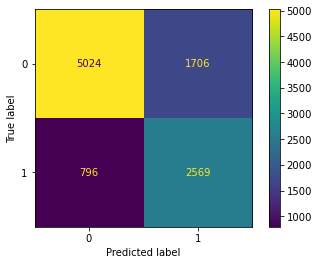

In [84]:
# Summarize the results
MLP_best = gsMLP.best_estimator_
print('Best : {}, using {}'.format(gsMLP.best_score_,gsMLP.best_params_))
report(gsMLP)

In [19]:
test = pd.read_csv('submission_predictors_terraclimate.csv').drop('Unnamed: 0',axis=1)
test

,id,decimalLatitude,decimalLongitude,occurrenceStatus,aet_mean,def_mean,pdsi_mean,pet_mean,ppt_mean,q_mean,soil_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean
0,0,-37.917146,145.207706,NaN,34.262500,94.183333,-1.266666,128.458333,40.008333,5.787500,19.329167,227.787500,23.284168,9.011668,1.065542,1.043167,3.337917
1,1,-37.750974,144.981501,NaN,34.262500,94.183333,-1.266666,128.458333,40.008333,5.787500,19.329167,227.787500,23.284168,9.011668,1.065542,1.043167,3.337917
2,2,-37.961600,145.348000,NaN,34.262500,94.183333,-1.266666,128.458333,40.008333,5.787500,19.329167,227.787500,23.284168,9.011668,1.065542,1.043167,3.337917
3,3,-37.621300,145.003000,NaN,34.262500,94.183333,-1.266666,128.458333,40.008333,5.787500,19.329167,227.787500,23.284168,9.011668,1.065542,1.043167,3.337917
4,4,-38.498100,145.647000,NaN,34.262500,94.183333,-1.266666,128.458333,40.008333,5.787500,19.329167,227.787500,23.284168,9.011668,1.065542,1.043167,3.337917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,4046,-31.884385,116.150192,NaN,50.529167,81.137500,-1.365000,131.612500,68.616667,18.204167,57.683333,231.645833,23.183335,10.612502,1.150875,1.001042,3.826250
4047,4047,-32.412962,115.779737,NaN,51.320833,88.137500,-2.365833,139.433333,60.000000,8.779167,61.729167,232.704167,24.072918,12.800418,1.356417,0.955208,5.162500
4048,4048,-32.147959,115.856628,NaN,50.991667,89.566667,-2.296666,140.491667,59.062500,8.120833,65.654167,233.208333,24.143335,12.958752,1.334000,0.995583,4.850417
4049,4049,-31.827000,116.238000,NaN,46.254167,86.800000,-1.086250,133.054167,60.600000,14.383333,43.779167,231.712500,23.624585,10.504168,1.139250,1.054083,3.619167


In [20]:
data_unseen = test[['def_mean','tmin_mean', 'pdsi_mean']]   #Use same column names in X

In [21]:
# transform data
data_unseen_Scaled = scaler.fit_transform(data_unseen)
print(data_unseen_Scaled)

[[0.45815349 0.         0.84201773]
 [0.45815349 0.         0.84201773]
 [0.45815349 0.         0.84201773]
 ...
 [0.34150963 0.88615531 0.15687366]
 [0.27160754 0.3350795  0.96202883]
 [0.46036425 0.5964453  0.90798223]]


In [22]:
def get_result(model,test_Scaled):
    test_result = model.predict(test_Scaled)
    test.occurrenceStatus = test_result
    print(test.occurrenceStatus.value_counts())

In [85]:
get_result(gsMLP,data_unseen_Scaled)

0    3242
1     809
Name: occurrenceStatus, dtype: int64


In [45]:
test.iloc[:,:4].to_csv('feature_samp_MLP_t_min_def_pdsi_6_18_6.csv')